## 1. Connexion à la base de données

In [65]:
import pandas as pd
import database
import matplotlib.pyplot as plt
import seaborn as sns

df = database.main()
df.drop_duplicates(keep='first', inplace=True)
print(df.head)

<bound method NDFrame.head of                                                  title          company  \
0                              Data Analyst internship     PGBPGNGLOBAL   
1                              Senior Data Analyst H/F            Qonto   
2                                         Data Analyst             Jump   
3                                         Data analyst          Oh BiBi   
4                                 Product Data Analyst        leboncoin   
...                                                ...              ...   
1024                               Analyste de données            Cubyn   
1025                          Product Data Analyst F/H        Leboncoin   
1026                                      Data Analyst         Peroptyx   
1027  [INTERNSHIP] Generative AI Intern Data Scientist  Publicis Groupe   
1028                                    Data Scientist        Carrefour   

                                            description            lo

## 2. Standardisation des salaires

In [66]:
import re

# Function to parse and standardize salary
def standardize_salary(salary):
    if salary is None:
        return None
    
    # Find all numbers in the salary string
    numbers = [float(num.replace('K', '000')) for num in re.findall(r'[\d.]+K?|[\d,]+', salary.replace(',', ''))]
    
    # Determine the salary period and calculate annual salary
    if 'a month' in salary:
        annual_salary = sum(numbers) / len(numbers) * 12  # Average if a range, then convert to annual
    elif 'a day' in salary:
        annual_salary = sum(numbers) / len(numbers) * 220  # Average if a range, then convert to annual
    elif 'a year' in salary:
        annual_salary = sum(numbers) / len(numbers)  # Average if a range
    else:
        annual_salary = None  # Undefined period
    
    return annual_salary

# Apply the function to each salary
df['salary_standardized'] = [standardize_salary(s) for s in df.salary]

## 3. EDA sur les salaires

In [67]:
# Descriptive statistics
desc_stats = df['salary_standardized'].describe()
desc_stats

count        68.000000
mean      59413.337353
std       45862.830302
min          18.000000
25%       13000.000000
50%       59500.000000
75%       91500.000000
max      159500.000000
Name: salary_standardized, dtype: float64

In [75]:
df_salary = df[df['salary_standardized'].notnull()]
# Filter rows where 'employment_type' contains 'Full-time'
df_filtered = df_salary[df_salary['employment_type'].str.contains('Full-time', case=False, na=False)]

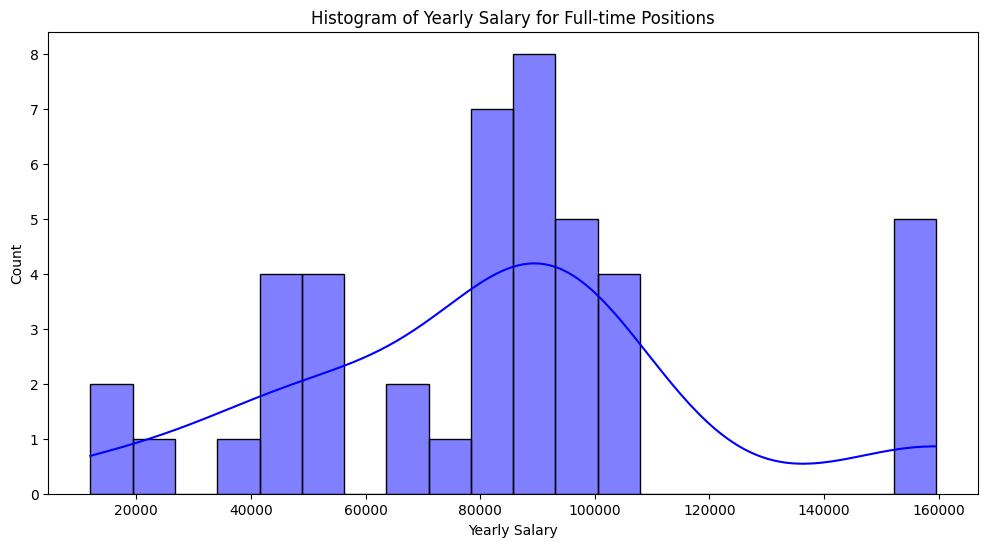

In [77]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['salary_standardized'], kde=True, bins=20, color='blue')
plt.title('Histogram of Yearly Salary for Full-time Positions')
plt.xlabel('Yearly Salary')
plt.show()

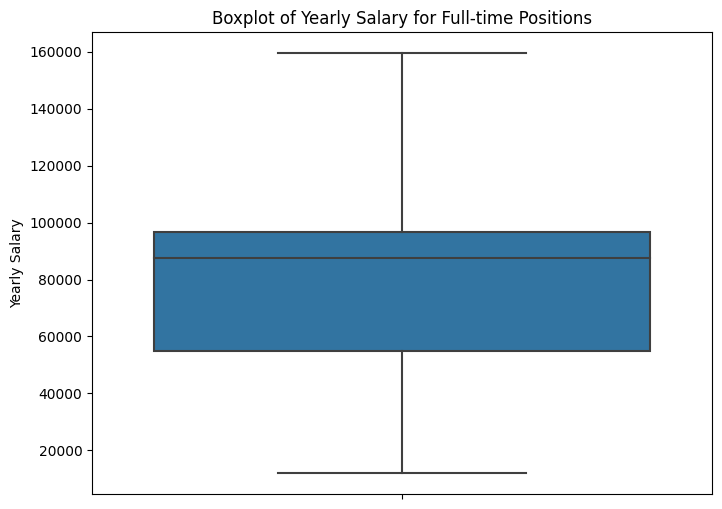

In [78]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y='salary_standardized')
plt.title('Boxplot of Yearly Salary for Full-time Positions')
plt.ylabel('Yearly Salary')
plt.show()


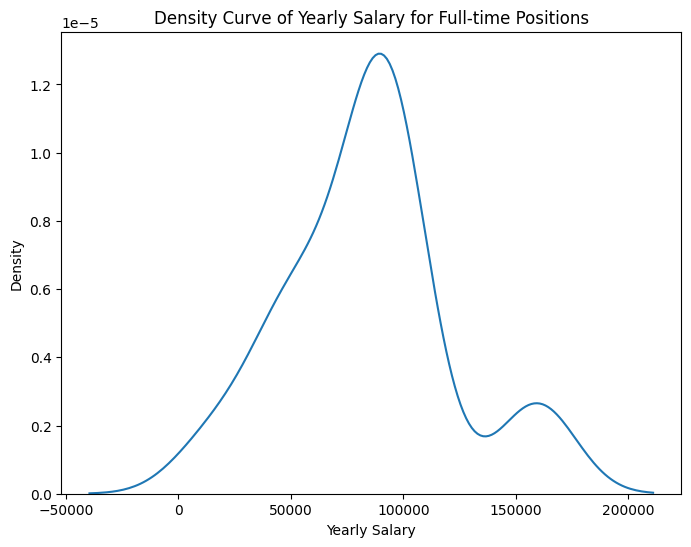

In [83]:
# Density curve
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_filtered, x='salary_standardized')
plt.title('Density Curve of Yearly Salary for Full-time Positions')
plt.xlabel('Yearly Salary')
plt.ylabel('Density')
plt.show()


In [87]:
# Group by 'employment_type' and calculate the mean and median salary
df_grouped = df_filtered.groupby('employment_type').agg({'salary_standardized': ['mean', 'median']})
df_grouped.columns = ['mean_salary', 'median_salary']
df_grouped = df_grouped.reset_index()
df_grouped

,employment_type,mean_salary,median_salary
0,Full-time,89099.543750,91500.00
1,Full-time and Internship,35324.313333,13463.94
2,Full-time and Temp work,81916.666667,85375.00
